# Neural Network from Scratch

Based on [cs231](http://cs231n.github.io/) by Stanford

In [366]:
# No Keras! No Pytorch!
# We will use Numpy :))

import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
import matplotlib
import matplotlib.pyplot as plt
# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

In [3]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [4]:
import sklearn.datasets

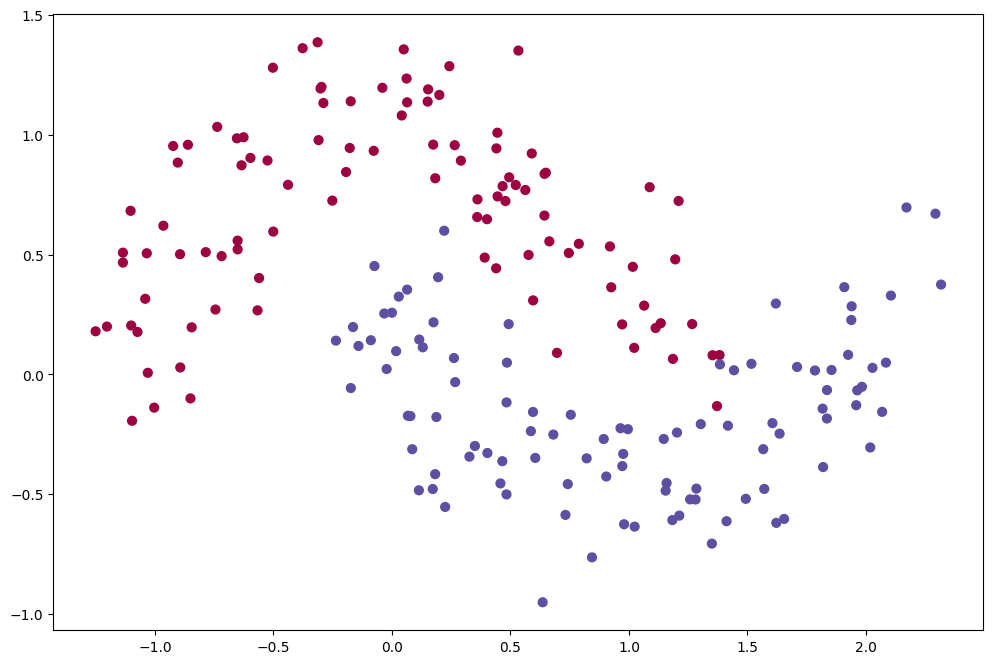

In [5]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, shuffle=False, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [97]:
def tanh(net, deriv=False):
    a = 2/(1+np.exp(-2*net)) - 1
    if deriv:
        return 1 - a*a
    else:
        return a

In [253]:
def relu(net, deriv=False):
    if deriv:
        return 1 * (net > 0)
    else:
        return net * (net > 0)

In [177]:
def sigmoid(x, deriv=False):
    if deriv:
        return activation(x) * (1 - activation(x))
    return 1/(1 + np.exp(-x))

In [433]:
class FCNN:
    def __init__(self, LR, activation='relu', HIDDEN_LAYER_SIZE=10, lambda_= 0, n_iter=1000):
        self.n_iter = n_iter
        self.HIDDEN_LAYER_SIZE = HIDDEN_LAYER_SIZE
        self.LR = LR
        if activation in ['relu', 'tanh', 'sigmoid']:
            self.activation = activation
        else:
            raise ValueError('Available activation functions: tanh, relu, sigmoid.')
        
        #l2
        self.lambda_ = lambda_


    
    def fit(self, X, y):
        n_rows_X = X.shape[0]
        n_features_X = X.shape[1]
        n_classes = len(np.unique(y))
        w0 = 2*np.random.random((n_features_X, self.HIDDEN_LAYER_SIZE))-1
        b0 = np.zeros((1, self.HIDDEN_LAYER_SIZE))
        w1 = 2*np.random.random((self.HIDDEN_LAYER_SIZE, 1 if n_classes < 3 else n_classes))-1
        b1 = np.zeros((1))
        
        for i in range(self.n_iter):
            a0 = X
            z1 = np.dot(a0, w0) + b0
            a1 = self.__activation(z1)
            z2 = np.dot(a1, w1) + b1
            a2 = self.__activation(z2) 
            
            L2_error = a2 - y.reshape(200, 1)

            delta_L2 =  L2_error * self.__activation(z2, deriv=True)
            L1_error = delta_L2.dot(w1.T)
            delta_L1 = L1_error * self.__activation(z1, deriv=True)


            w1 = w1 - self.LR * (a1.T.dot(delta_L2) + self.lambda_* w1)
            b1 = b1 - self.LR * (np.sum(delta_L2, axis=0) + self.lambda_ * b1)
            w0 = w0 - self.LR * (a0.T.dot(delta_L1) + self.lambda_* w0)
            b0 = b0 - self.LR * (np.sum(delta_L1, axis=0) + self.lambda_ * b0)
            
#             if i % 200 == 0:
#                 print(np.mean(np.abs(L2_error)))
                
        self.w1 = w1
        self.w0 = w0
        self.b0 = b0
        self.b1 = b1
                
                
             
    
    def __activation(self, z, deriv=False):   
        if self.activation == 'relu':
            z = z.astype(np.float32)
            a = relu(z, deriv=deriv)
        elif self.activation == 'sigmoid':
            a = sigmoid(z, deriv=deriv)
        else:
            a = tahn(z, deriv=deriv)    
        return a
    
    def predict_proba(self, X):
        a0 = X
        z1 = np.dot(a0, self.w0) + self.b0
        a1 = self.__activation(z1)
        z2 = np.dot(a1, self.w1) + self.b1
        a2 = self.__activation(z2) 
        return a2
    
    def predict(self, X):
        proba = self.predict_proba(X)
        return np.vectorize(lambda p: 1 if p > 0.5 else 0)(proba)

In [387]:
def show_weights(nn):
    print(f'maximum weight in L1: {round(nn.w0.max(), 2)}, minimum weight in L1: {round(nn.w0.min(),2)}, minimum absolute weight in L1: {round(np.abs(nn.w0).min(), 2)}')
    print(f'maximum weight in L2: {round(nn.w1.max(), 2)}, minimum weight in L2: {round(nn.w1.min(),2)}, minimum absolute weight in L2: {round(np.abs(nn.w1).min(), 2)}') 

maximum weight in L1: 2.52, minimum weight in L1: -7.43, minimum absolute weight in L1: 0.34
maximum weight in L2: 8.82, minimum weight in L2: -6.85, minimum absolute weight in L2: 1.88


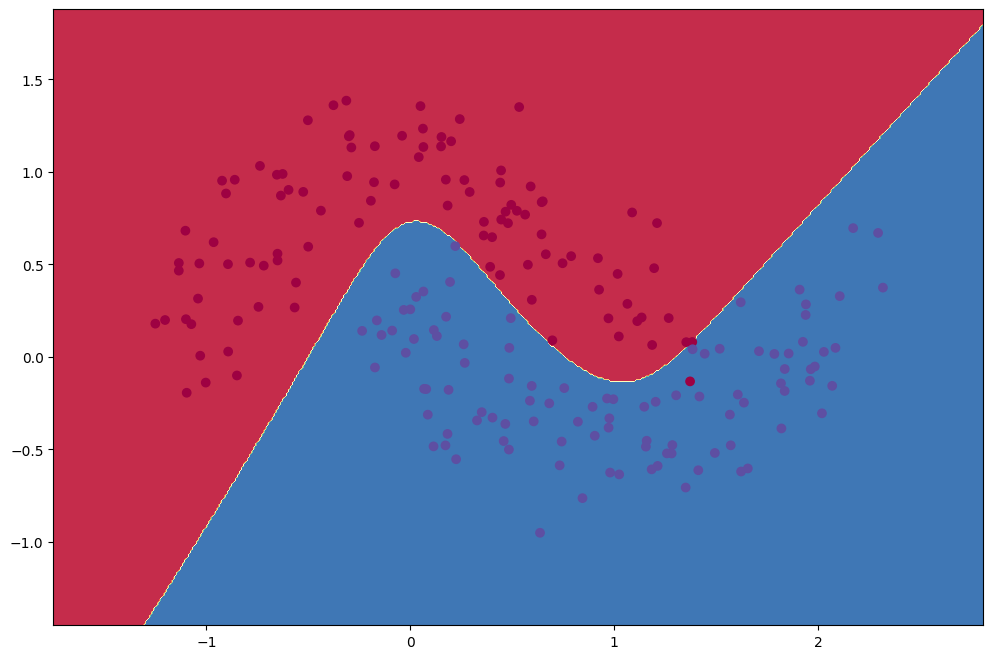

In [393]:
nn = FCNN(LR=0.1,
         activation='sigmoid',
         HIDDEN_LAYER_SIZE=10,
         lambda_=0.0,
         n_iter=1000)
nn.fit(X, y)
show_weights(nn)
plot_decision_boundary(lambda x: nn.predict(x))

maximum weight in L1: 0.85, minimum weight in L1: -5.34, minimum absolute weight in L1: 0.85
maximum weight in L2: 6.73, minimum weight in L2: -2.12, minimum absolute weight in L2: 1.77


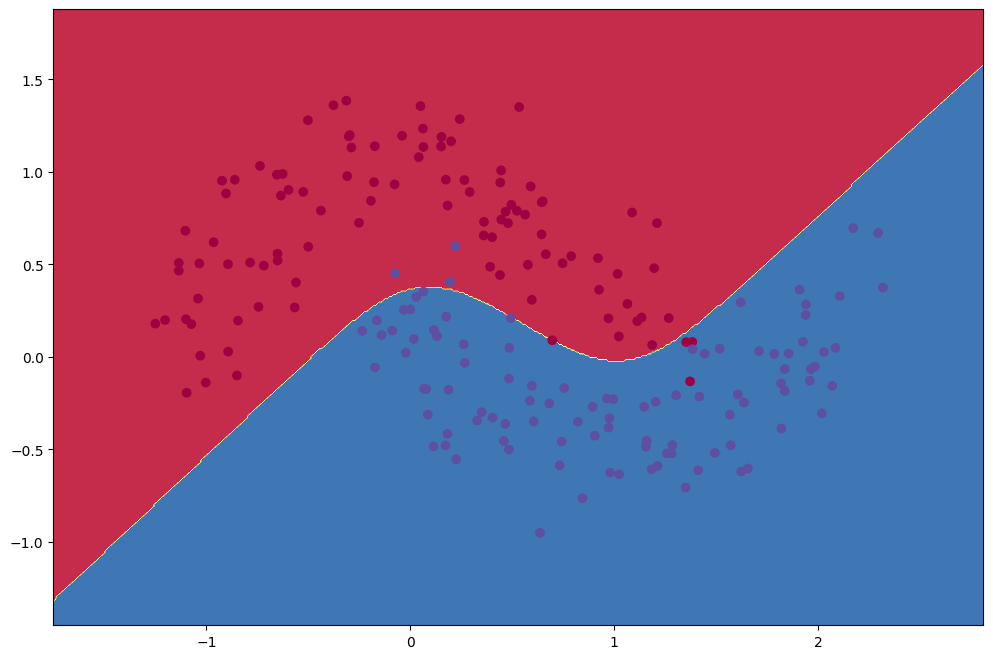

In [445]:
nn = FCNN(LR=0.1,
         activation='sigmoid',
         HIDDEN_LAYER_SIZE=10,
         lambda_=0.04,
         n_iter=10000)
nn.fit(X, y)
show_weights(nn)
plot_decision_boundary(lambda x: nn.predict(x))

maximum weight in L1: 3.88, minimum weight in L1: -3.4, minimum absolute weight in L1: 0.2
maximum weight in L2: 1.62, minimum weight in L2: -0.09, minimum absolute weight in L2: 0.0


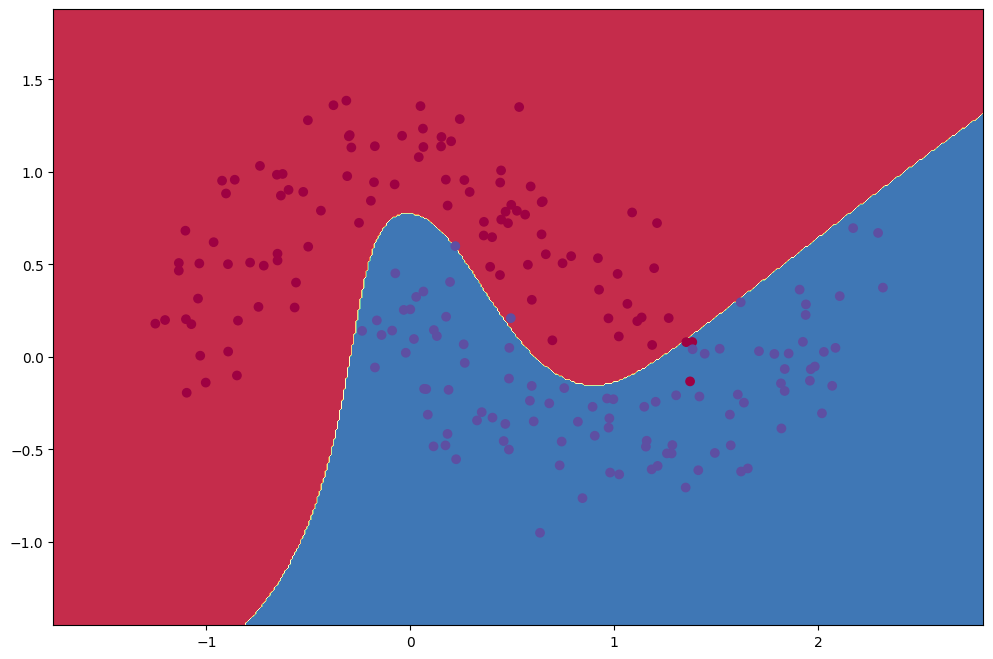

In [465]:
nn = FCNN(LR=0.01,
         activation='tanh',
         HIDDEN_LAYER_SIZE=10,
         lambda_=0.00,
         n_iter=1000)
nn.fit(X, y)
show_weights(nn)
plot_decision_boundary(lambda x: nn.predict(x))

maximum weight in L1: 2.51, minimum weight in L1: -2.36, minimum absolute weight in L1: 0.01
maximum weight in L2: 1.26, minimum weight in L2: -0.01, minimum absolute weight in L2: 0.0


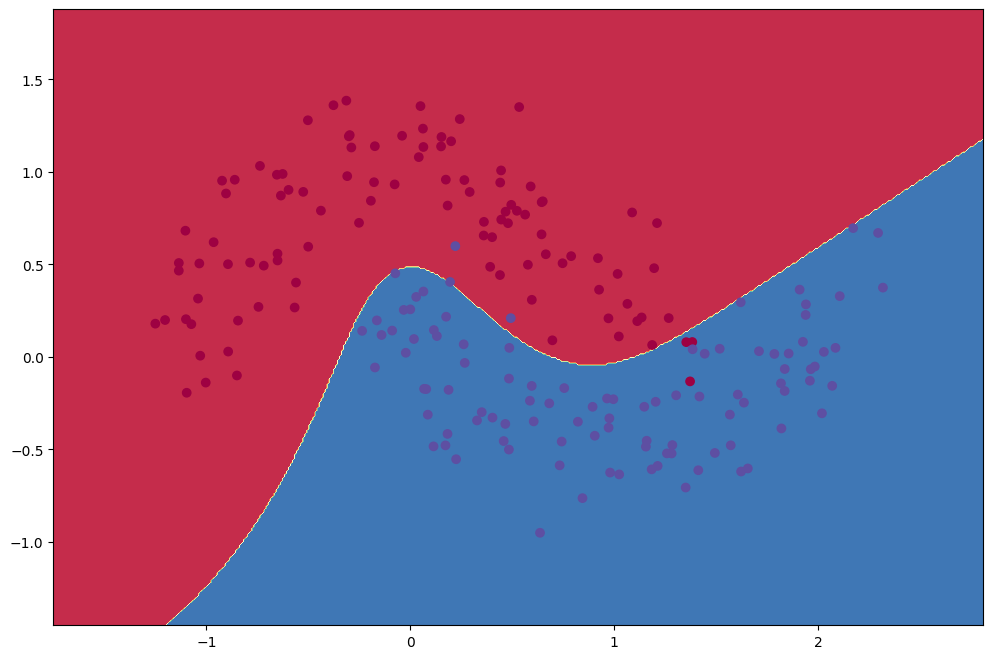

In [476]:
nn = FCNN(LR=0.01,
         activation='tanh',
         HIDDEN_LAYER_SIZE=10,
         lambda_=0.19,
         n_iter=1000)
nn.fit(X, y)
show_weights(nn)
plot_decision_boundary(lambda x: nn.predict(x))

maximum weight in L1: 0.94, minimum weight in L1: -1.41, minimum absolute weight in L1: 0.11
maximum weight in L2: 1.51, minimum weight in L2: -1.18, minimum absolute weight in L2: 0.44


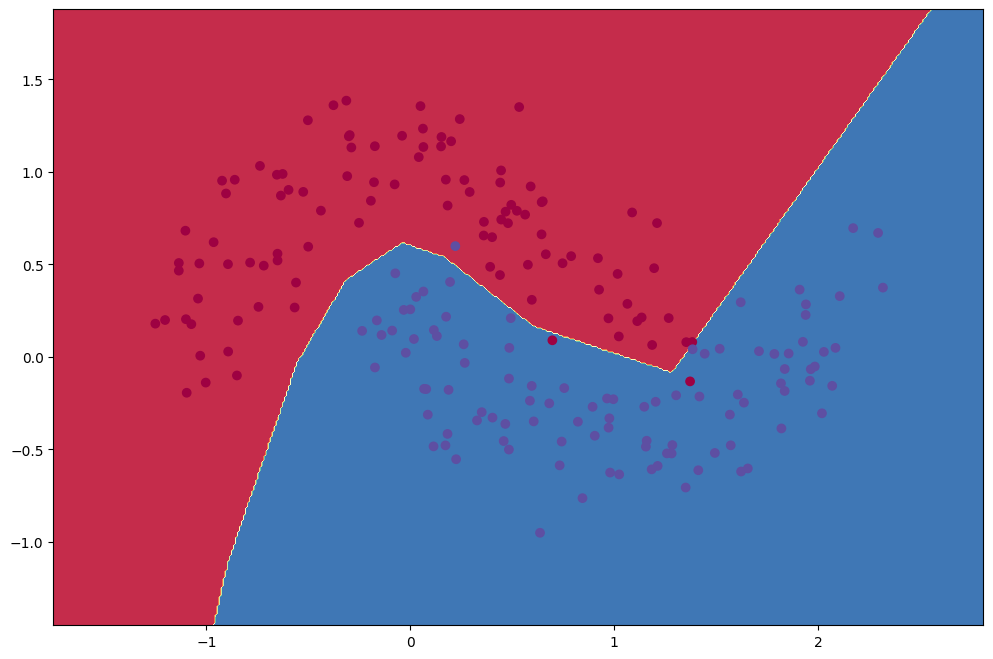

In [482]:
nn = FCNN(LR=0.001,
         activation='relu',
         HIDDEN_LAYER_SIZE=10,
         lambda_=0.0,
         n_iter=1000)
nn.fit(X, y)
show_weights(nn)
plot_decision_boundary(lambda x: nn.predict(x))

maximum weight in L1: 0.88, minimum weight in L1: -1.04, minimum absolute weight in L1: 0.04
maximum weight in L2: 1.21, minimum weight in L2: -1.38, minimum absolute weight in L2: 0.2


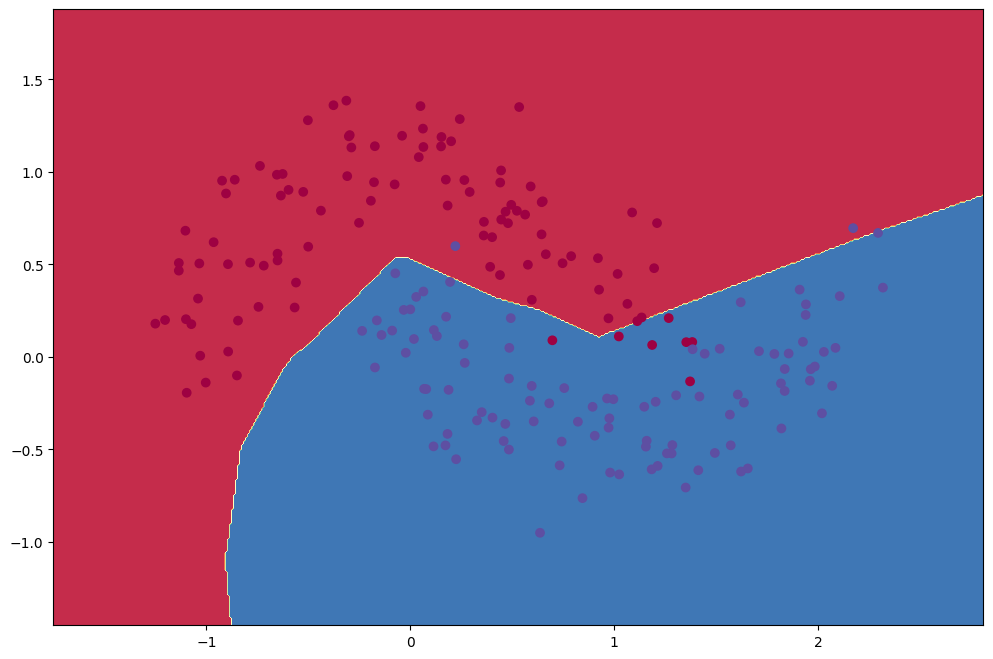

In [491]:
nn = FCNN(LR=0.001,
         activation='relu',
         HIDDEN_LAYER_SIZE=10,
         lambda_=0.03,
         n_iter=1000)
nn.fit(X, y)
show_weights(nn)
plot_decision_boundary(lambda x: nn.predict(x))

##  -- Homework --

1. Try other activation function (tanh, relu)

1. Add regularization 

1. Add dropout (http://cs231n.github.io/neural-networks-2/)


---

## Sources

* [cs231](http://cs231n.github.io/) by Stanford
* [https://mlfromscratch.com/neural-networks-explained](https://mlfromscratch.com/neural-networks-explained)